# 案例：Fama-French三因子模型的应用

## 1.读取Fama-French三因子数据

Fama-French三因子数据来自于French在达特茅斯学院的[MBA网站](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)上。

In [1]:
import pandas as pd
df = pd.read_csv('datasets/F-F_Research_Data_Factors_weekly_CSV.csv', index_col=0)
df.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
19260702,1.60,-0.62,-0.83,0.056
19260710,0.36,-0.88,0.31,0.056
19260717,1.01,0.59,-1.44,0.056
19260724,-2.05,0.10,-0.18,0.056
19260731,3.04,-1.82,-0.90,0.056


In [2]:
df = df[['Mkt-RF', 'SMB', 'HML']]
name_dict = {'Mkt-RF':'Market Factor (MER)',
            'SMB':'Size Factor (SMB)',
            'HML':'Value Factor (HML)'}

In [3]:
df.columns = [name_dict[i] for i in df.columns]
df.index = df.index.astype(str)
df.index = pd.to_datetime(df.index, format='%Y%m%d')

In [4]:
df

,Market Factor (MER),Size Factor (SMB),Value Factor (HML)
Date,,,
1926-07-02,1.60,-0.62,-0.83
1926-07-10,0.36,-0.88,0.31
1926-07-17,1.01,0.59,-1.44
1926-07-24,-2.05,0.10,-0.18
1926-07-31,3.04,-1.82,-0.90
...,...,...,...
2023-03-31,3.56,-0.09,-0.10
2023-04-06,-0.51,-2.67,0.97
2023-04-14,0.91,0.10,0.24


## 2.读取资产数据

当我们研究投资组合，一个最佳的研究对象自然是股神巴菲特(Warren Buffett)。他在去50间实现了接近20%化收益。巴菲特师承价值投资的代表Benjamin Grahan（格雷厄姆)，非常注重股票的购买价格(安全性)。与此同时，他也逐渐发展了自己的投资格，特别是对质量的高度重视。巴菲特是否真的具有这样的投资风格?经典的多因子否可以很好地解释巴菲特的优异业绩?这些都是非常引人关注的问题。

这里我们选择其所管理的伯克希尔哈撒韦公司的股票数据，数据来源为[investing.com](https://cn.investing.com/)，并选取其日收盘价。

In [5]:
import pandas as pd
BRK = pd.read_csv('datasets/BRKa历史数据.csv', index_col=0)
BRK = BRK.sort_index()
BRK.index = pd.to_datetime(BRK.index, format='%Y-%m-%d')
BRK.head()

,收盘,开盘,高,低,交易量,涨跌幅
日期,,,,,,
2010-01-11,"99,999","100,100","100,750","99,320",1.95K,-0.30%
2010-01-12,"99,350","99,505","99,949","99,350",2.23K,-0.65%
2010-01-13,"99,150","99,400","99,949","99,150",1.02K,-0.20%
2010-01-14,"99,000","99,160","99,480","98,920",1.43K,-0.15%
2010-01-15,"97,500","99,000","99,363","97,205",2.66K,-1.52%


对数据的格式进行整理

In [6]:
import numpy as np
BRK['收盘'] = np.array([i.replace(',', '') for i in BRK['收盘']], dtype='float')

<AxesSubplot:title={'center':'伯克希尔哈撒韦公司的股价'}, xlabel='日期'>

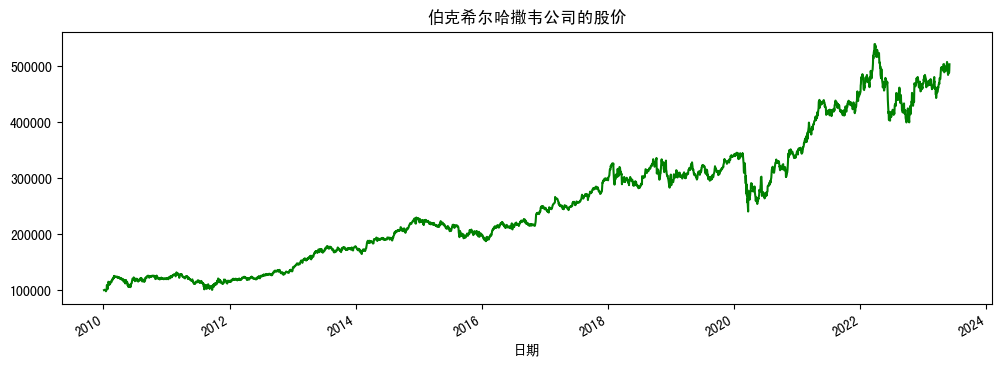

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'simhei'
BRK['收盘'].plot(figsize=(12,4), title='伯克希尔哈撒韦公司的股价', color='green')

In [8]:
df['Return'] = BRK['收盘']/BRK['收盘'].shift(1) - 1
df['Return'] = df['Return'].fillna(method='ffill')
df = df[df.index>pd.to_datetime('2010-01-01')]
df.head()

,Market Factor (MER),Size Factor (SMB),Value Factor (HML),Return
Date,,,,
2010-01-08,2.89,0.21,3.92,0.003000
2010-01-15,-0.91,0.10,-1.53,-0.015152
2010-01-22,-3.57,0.91,-1.88,-0.035370
2010-01-29,-1.70,-0.71,0.09,0.032432
2010-02-05,-0.81,-0.71,-0.07,0.010101


<AxesSubplot:>

/Users/hans/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


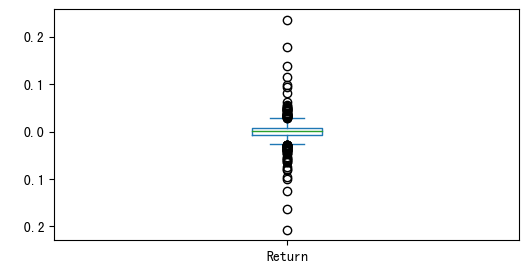

In [9]:
df['Return'].plot(kind='box', grid=False, figsize=(6,3))

剔除可能之后会影响回归模型的收益率极值，

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_19282/3174423405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'][(df['Return']>(QU + 1.5*IQR)) | (df['Return']<(QL-1.5*IQR))] = np.nan
/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_19282/3174423405.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Return'] = df['Return'].fillna(df['Return'].quantile(0.5))


<AxesSubplot:>

/Users/hans/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


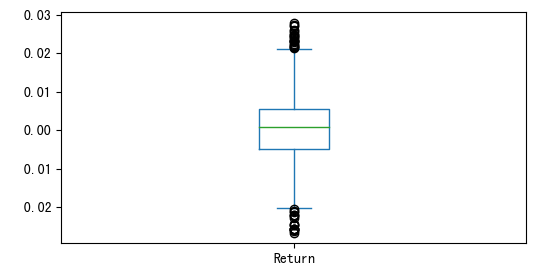

In [10]:
import numpy as np
QU = df['Return'].quantile(0.75)
QL = df['Return'].quantile(0.25)
IQR = QU - QL
df['Return'][(df['Return']>(QU + 1.5*IQR)) | (df['Return']<(QL-1.5*IQR))] = np.nan
df['Return'] = df['Return'].fillna(df['Return'].quantile(0.5))
df['Return'].plot(kind='box', grid=False, figsize=(6,3))

## 3.时序回归

我们使用seaborn来绘制变量和变量之间相关性的热力图，颜色为深色代表相关性越弱，颜色越浅代表相关性越强。接近红色，为正相关，接近蓝色，为负相关。


<AxesSubplot:>

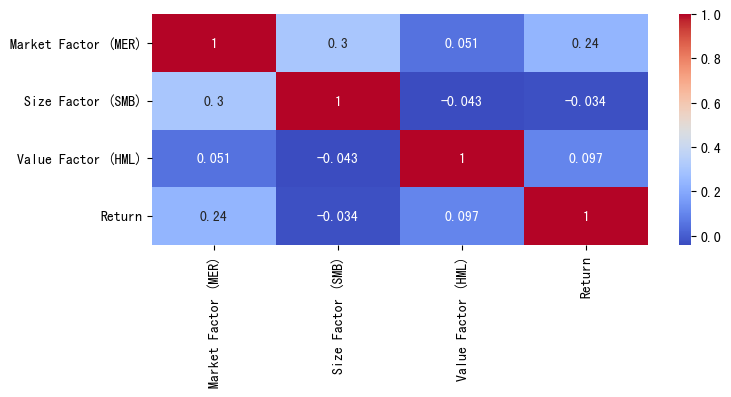

In [11]:
import seaborn as sns
plt.figure(figsize=(8,3))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')


观察上面结果，部分解释变量和解释变量之间存在很高的相关性。

当然，我们可以绘制散点图观察解释变量和被解释变量之间的相关性，同时绘制一元回归的回归线。

/Users/hans/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


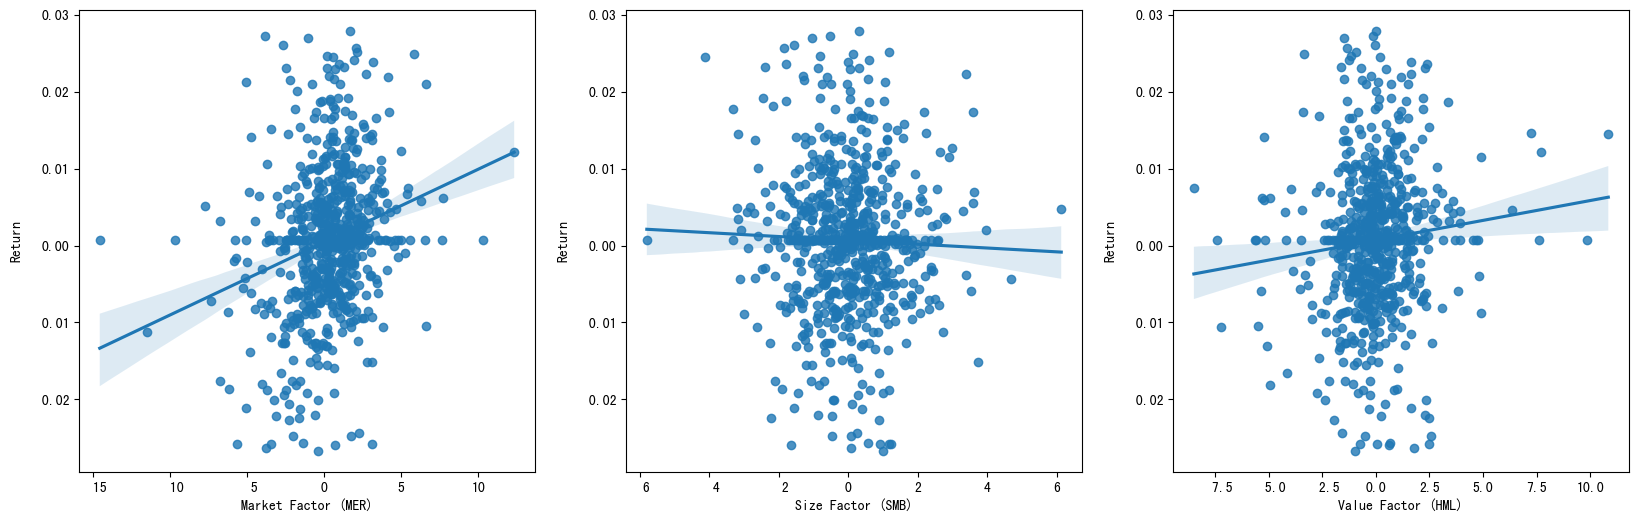

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
for i, k in enumerate(['Market Factor (MER)', 'Size Factor (SMB)', 'Value Factor (HML)']):
    sns.regplot(y=df['Return'], x=df[k], ax=axs[i])

对于解释变量（自变量）X和被解释变量（因变量）y进行OLS回归：

In [13]:
import statsmodels.api as sm
df['Intercept'] = 1.
model=sm.OLS(df['Return'],
             df[['Intercept', 'Market Factor (MER)', 'Size Factor (SMB)', 'Value Factor (HML)']])
result=model.fit()
result.summary(alpha=0.05)

/var/folders/7m/rgg1hhpj3yb1j0cf0c82yq1w0000gn/T/ipykernel_19282/3931929754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Intercept'] = 1.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     18.66
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.19e-11
Time:                        01:03:37   Log-Likelihood:                 2279.6
No. Observations:                 695   AIC:                            -4551.
Df Residuals:                     691   BIC:                            -4533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0004      0.000      1.245      0.213      -0.000       0.001
Market Factor (MER)     0.0011      0.000      6.950      0.000       0.001       0.001
Size Factor (SMB)      -0.0008      0.000     -2.878      0.004      -0.001      -0.000
Value Factor (HML)      0.0004      0.000      2.144      0.032    3.52e-05       0.001
==============================================================================
Omnibus:                       15.424   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.397
Skew:                           0.148   Prob(JB):                     3.06e-06
Kurtosis:                       3.888   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

通过上述的分析，我们看到经典的三因子模型在每个因子上的风险暴露都是统计显著的，说明三个因子每个因子都能够解释一部分收益来源。但是模型整体的$R^2$（0.075）比较低，说明三因子模型的解释力度不够，无法解释大部分收益来源。

## Fama-Macbeth回归

In [27]:
y.iloc[0]

0.0029999999999998916

In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
df = df.sort_values('Date')
X = results.params[1:].T
X['const'] = 1.
y = df['Return']
window_size = 20 #滑动周期为52周（一年）
regressions = []
for i in range(len(df)):
    model = sm.OLS(y.iloc[i], X)
    results = model.fit()
    regressions.append(results.params[1:])  

TypeError: object of type 'numpy.float64' has no len()

## 练习
1. 请使用时序回归方法，应用五因子模型对伯克希尔哈撒韦的股价进行回归，因子数据在`datasets/F-F_Research_Data_5_Factors_XX.csv`
2. 请使用截面回归方法，应用三因子模型对伯克希尔哈撒韦的股价进行回归

## 参考
1. ken.french数据库：http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
2. Fama and French, 1993, "Common Risk Factors in the Returns on Stocks and Bonds," Journal of Financial Economics